# Week 4 Individual Assignment - Smallplexes in Los Angeles

This noteboke will explore the current state of smallplexes in the City of Los Angeles. For the purposes of this excersise, 'smallplex' ranges anywhere from 2 to 4 units. I extracted information on smallplexes based on a permits dataset that can be found [here](https://data.lacity.org/City-Infrastructure-Service-Requests/Building-and-Safety-Permit-Information-Old/yv23-pmwf/data).  

With a better understanding of the city's current relationship with smallplexes, I can better understand and infer the impacts that SB9 will have in Los Angeles.

## Importing Libraries

Like always, I start by importing all the libraries I might need.

In [1]:
import geopandas as gpd

import matplotlib.pyplot as plt

import networkx as nx

import osmnx as ox

import contextily as ctx

import pandas as pd

import folium

from shapely.geometry import Point

## Importing Data

I then import the permits data that I will be using. The csv file was very large, so I had to trim all the unnecessary data on excel before uploading it to JupyterHub.

In [2]:
Smallplex_Data = gpd.read_file('Data/Smallplex Data.csv')

I started be exploring the dataset that I uploaded.

Since the dataset had many columns, I had to tell JupyterHub to display them all.

In [3]:
Smallplex_Data.shape

(2352, 56)

In [4]:
Smallplex_Data.head(5)

Assessor Book Assessor Page Assessor Parcel                 Tract Block Lot  \
0          5048             5              37               TR 6377     1  20   
1          4330             4              10              TR 11875        14   
2          2245             2              16               TR 6142        42   
3          5040            30              16  IRENE TOLCHARD TRACT         3   
4          2329            11               6               TR 1336         1   

  Reference # (Old Permit #)      PCIS Permit #       Status Status Date  ...  \
0                  20ON 1976  19010-20000-02371       Issued       44134  ...   
1                  17WL84002  17010-30000-00174  CofO Issued       43843  ...   
2                  14VN88831  13010-20000-00689  CofO Issued       43844  ...   
3                  18LA14011  16014-30000-06026  CofO Issued       43844  ...   
4                  20VN12690  19010-20000-03276       Issued       43851  ...   

    Applicant Address 1 Applicant Address 2 Applicant Address 3          Zone  \
0    10999 RIVERSIDE DR                #300    N. HOLLYWOOD, CA       RD1.5-1   
1                                                                [Q]RD2-1VL-O   
2  6411 INDEPENDENCE AV                      WOODLAND HILLS, CA    [Q]RD1.5-1   
3                                                                     RD1.5-1   
4   20806 SPRUCE CIRCLE                        PORTER RANCH, CA    [Q]RD1.5-1   

  Occupancy Floor Area-L.A. Building Code Definition Census Tract  Latitude  \
0                                               7029      2199.02  34.03317   
1                                              13233         2690  34.05319   
2                                               8660      1286.01   34.1786   
3                                               8768         2226  34.02108   
4                                               8814       1235.1  34.19371   

    Longitude geometry  
0  -118.36779     None  
1  -118.40537     None  
2  -118.44681     None  
3  -118.29312     None  
4  -118.42782     None  

[5 rows x 56 columns]

In [5]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [6]:
Smallplex_Data.head(5)

Assessor Book Assessor Page Assessor Parcel                 Tract Block Lot  \
0          5048             5              37               TR 6377     1  20   
1          4330             4              10              TR 11875        14   
2          2245             2              16               TR 6142        42   
3          5040            30              16  IRENE TOLCHARD TRACT         3   
4          2329            11               6               TR 1336         1   

  Reference # (Old Permit #)      PCIS Permit #       Status Status Date  \
0                  20ON 1976  19010-20000-02371       Issued       44134   
1                  17WL84002  17010-30000-00174  CofO Issued       43843   
2                  14VN88831  13010-20000-00689  CofO Issued       43844   
3                  18LA14011  16014-30000-06026  CofO Issued       43844   
4                  20VN12690  19010-20000-03276       Issued       43851   

     Permit Type Permit Sub-Type Permit Category Project Number Event Code  \
0       Bldg-New       Apartment      Plan Check                             
1       Bldg-New       Apartment      Plan Check                             
2       Bldg-New       Apartment      Plan Check                             
3  Bldg-Addition       Apartment      Plan Check                             
4       Bldg-New       Apartment      Plan Check                             

  Initiating Office Issue Date Address Start Address Fraction Start  \
0          VAN NUYS      44134          2553                          
1           WEST LA      43010          1333                          
2          VAN NUYS      42004         14409                          
3           WEST LA      43417          1147                          
4          VAN NUYS      43851         13536                          

  Address End Address Fraction End Street Direction    Street Name  \
0        2553                                     S        THURMAN   
1        1333                                     S  BEVERLY GREEN   
2       14409                                     W          TIARA   
3        1147                                     W           37TH   
4       13536                                     W        VANOWEN   

  Street Suffix Suffix Direction Unit Range Start Unit Range End Zip Code  \
0           AVE                                                     90016   
1            DR                             44200          44200    90035   
2            ST                         Unit #1-4                   91401   
3            ST                           #1 - #5                   90007   
4            ST                                                     91405   

                                    Work Description Valuation  \
0  NEW 3 STORY 4-UNIT APARTMENT BUILDING WITH ROO...    800000   
1  NEW 2-STORY WITH MEZZANINE 4-UNIT APARTMENT BU...   1780000   
2  New 34' x 108' fully sprinklered three story, ...    900000   
3  add 4-story addition and 300 s.f. of deck in r...    950000   
4  (N) 3-STORY TYPE V-B 4-UNIT APARTMENT BUILDING...    983714   

  Floor Area-L.A. Zoning Code Definition # of Residential Dwelling Units  \
0                                   5221                               4   
1                                   9106                               4   
2                                   7196                               4   
3                                   9284                               4   
4                                   7611                               4   

  # of Stories     Contractor's Business Name           Contractor Address  \
0            3       LUM RAYMOND CONSTRUCTION        4625 WEST 64TH STREET   
1            2  ESAB CONSTRUCTION CORPORATION           9025 WILSHIRE BLVD   
2            3       ROCKPORT DEVELOPMENT INC  1619 WEST GARVEY SUITE #207   
3            4            EXCELLENCE BUILDERS             3128 JAMES COURT   
4            3                  OW

The data type for all my columns were read as 'objects'. Therefore, I had to change them from 'object' to 'float64' to better interpret the information down the line.

The three columns that I changed from 'object' to 'float64' were Longitude, Latitude and Valuation. 

In [7]:
Smallplex_Data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Assessor Book                             2352 non-null   object  
 1   Assessor Page                             2352 non-null   object  
 2   Assessor Parcel                           2352 non-null   object  
 3   Tract                                     2352 non-null   object  
 4   Block                                     2352 non-null   object  
 5   Lot                                       2352 non-null   object  
 6   Reference # (Old Permit #)                2352 non-null   object  
 7   PCIS Permit #                             2352 non-null   object  
 8   Status                                    2352 non-null   object  
 9   Status Date                               2352 non-null   object  
 10  Permit Type     

In [8]:
Smallplex_Data['Latitude'] = Smallplex_Data.Latitude.astype(float)
Smallplex_Data['Longitude'] = Smallplex_Data.Longitude.astype(float)
Smallplex_Data['Valuation'] = Smallplex_Data.Valuation.astype(float)

In [9]:
Smallplex_Data.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 56 columns):
 #   Column                                    Non-Null Count  Dtype   
---  ------                                    --------------  -----   
 0   Assessor Book                             2352 non-null   object  
 1   Assessor Page                             2352 non-null   object  
 2   Assessor Parcel                           2352 non-null   object  
 3   Tract                                     2352 non-null   object  
 4   Block                                     2352 non-null   object  
 5   Lot                                       2352 non-null   object  
 6   Reference # (Old Permit #)                2352 non-null   object  
 7   PCIS Permit #                             2352 non-null   object  
 8   Status                                    2352 non-null   object  
 9   Status Date                               2352 non-null   object  
 10  Permit Type     

In [10]:
Smallplex_Data.head(5)

Assessor Book Assessor Page Assessor Parcel                 Tract Block Lot  \
0          5048             5              37               TR 6377     1  20   
1          4330             4              10              TR 11875        14   
2          2245             2              16               TR 6142        42   
3          5040            30              16  IRENE TOLCHARD TRACT         3   
4          2329            11               6               TR 1336         1   

  Reference # (Old Permit #)      PCIS Permit #       Status Status Date  \
0                  20ON 1976  19010-20000-02371       Issued       44134   
1                  17WL84002  17010-30000-00174  CofO Issued       43843   
2                  14VN88831  13010-20000-00689  CofO Issued       43844   
3                  18LA14011  16014-30000-06026  CofO Issued       43844   
4                  20VN12690  19010-20000-03276       Issued       43851   

     Permit Type Permit Sub-Type Permit Category Project Number Event Code  \
0       Bldg-New       Apartment      Plan Check                             
1       Bldg-New       Apartment      Plan Check                             
2       Bldg-New       Apartment      Plan Check                             
3  Bldg-Addition       Apartment      Plan Check                             
4       Bldg-New       Apartment      Plan Check                             

  Initiating Office Issue Date Address Start Address Fraction Start  \
0          VAN NUYS      44134          2553                          
1           WEST LA      43010          1333                          
2          VAN NUYS      42004         14409                          
3           WEST LA      43417          1147                          
4          VAN NUYS      43851         13536                          

  Address End Address Fraction End Street Direction    Street Name  \
0        2553                                     S        THURMAN   
1        1333                                     S  BEVERLY GREEN   
2       14409                                     W          TIARA   
3        1147                                     W           37TH   
4       13536                                     W        VANOWEN   

  Street Suffix Suffix Direction Unit Range Start Unit Range End Zip Code  \
0           AVE                                                     90016   
1            DR                             44200          44200    90035   
2            ST                         Unit #1-4                   91401   
3            ST                           #1 - #5                   90007   
4            ST                                                     91405   

                                    Work Description  Valuation  \
0  NEW 3 STORY 4-UNIT APARTMENT BUILDING WITH ROO...   800000.0   
1  NEW 2-STORY WITH MEZZANINE 4-UNIT APARTMENT BU...  1780000.0   
2  New 34' x 108' fully sprinklered three story, ...   900000.0   
3  add 4-story addition and 300 s.f. of deck in r...   950000.0   
4  (N) 3-STORY TYPE V-B 4-UNIT APARTMENT BUILDING...   983714.0   

  Floor Area-L.A. Zoning Code Definition # of Residential Dwelling Units  \
0                                   5221                               4   
1                                   9106                               4   
2                                   7196                               4   
3                                   9284                               4   
4                                   7611                               4   

  # of Stories     Contractor's Business Name           Contractor Address  \
0            3       LUM RAYMOND CONSTRUCTION        4625 WEST 64TH STREET   
1            2  ESAB CONSTRUCTION CORPORATION           9025 WILSHIRE BLVD   
2            3       ROCKPORT DEVELOPMENT INC  1619 WEST GARVEY SUITE #207   
3            4            EXCELLENCE BUILDERS             3128 JAMES COURT   
4            3              

Since this dataset uploaded to JupyterHub as a csv file, there was no geometry associated to each row. I had to Google how to generate a geometry column, and manged to do so. However, I am still uncertain of what the error message associated with it is saying.

In [11]:
geometry = [Point(xy) for xy in zip(Smallplex_Data['Longitude'], Smallplex_Data['Latitude'])]

crs = {'init': 'epsg:4326'}

Smallplex_Data = gpd.GeoDataFrame(Smallplex_Data, crs=crs, geometry=geometry)

/opt/conda/lib/python3.9/site-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


In [12]:
Smallplex_Data.sample(5)

Assessor Book Assessor Page Assessor Parcel  \
996           5048             4              31   
1447          5037            11              16   
1098          6020             3               7   
2243          5065             3              33   
2294          6069             8              14   

                                                  Tract Block  Lot  \
996                                             TR 6377     3    5   
1447                             NORMANDIE AVENUE TRACT         35   
1098  THE MC CARTHY COMPANY'S FLORENCE AVENUE HEIGHT...     2   26   
2243                                            TR 5855         66   
2294           AMENDED PLAT OF A PORTION OF ALTON TRACT        469   

     Reference # (Old Permit #)      PCIS Permit #       Status Status Date  \
996                   18SL63379  17010-70000-03041  CofO Issued       43518   
1447                  20LA47581  19010-70000-06086  CofO Issued       44471   
1098                  14LA32502  14010-10000-00164  CofO Issued       41963   
2243                  19WL98982  17010-10000-03525       Issued       43602   
2294                  18LA99648  17010-10000-01405  CofO Issued       43412   

     Permit Type         Permit Sub-Type Permit Category Project Number  \
996     Bldg-New  1 or 2 Family Dwelling      Plan Check                  
1447    Bldg-New  1 or 2 Family Dwelling      Plan Check                  
1098    Bldg-New  1 or 2 Family Dwelling      Plan Check                  
2243    Bldg-New  1 or 2 Family Dwelling      Plan Check                  
2294    Bldg-New  1 or 2 Family Dwelling      Plan Check                  

     Event Code Initiating Office Issue Date Address Start  \
996                      SOUTH LA      43151          2520   
1447                     SOUTH LA      44067          1263   
1098                        METRO      41787           834   
2243                        METRO      43602          6118   
2294                        METRO      43179          1679   

     Address Fraction Start Address End Address Fraction End Street Direction  \
996                                2520                44198                S   
1447                               1263                44198                W   
1098                                836                                     W   
2243                               6120                                     W   
2294                               1681                                     E   

         Street Name Street Suffix Suffix Direction Unit Range Start  \
996          THURMAN           AVE                                     
1447  ROLLAND CURTIS            PL                                     
1098            73RD            ST                                     
2243          HARGIS            ST                                     
2294           110TH            ST                                     

     Unit Range End Zip Code  \
996                    90016   
1447                   90037   
1098                   90044   
2243                   90034   
2294                   90059   

                                       Work Description  Valuation  \
996   NEW THREE STORY DUPLEX OVER ATTACHED 4 CAR GAR...   474000.0   
1447            NEW 3 STORY DUPLEX WITH ATTACHED GARAGE   380000.0   
1098  NEW 2-STORY DUPLEX.  FULLY SPRINKLERED WITH NF...   384695.0   
2243       NEW 3 STORY DUPLEX W/PARKING ON GROUND FLOOR   600000.0   
2294  NEW 2 STORY DUPLEX WITH ATTACHED 2 CAR GARAGE....   362400.0   

     Floor Area-L.A. Zoning Code Definition # of Residential Dwelling Units  \
996                                    4204                               2   
1447                                   3300                               2   
1098                                   3223                               2   
2243                                   4568                               2   
2294                                   3454

I then plotted all the points on a simple graph just to see if the geometry column I generated worked. 

<AxesSubplot:>

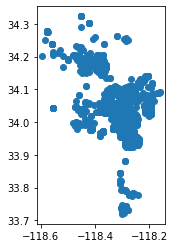

In [13]:
Smallplex_Data.plot()

A lot of the columns associated with this dataset were unnecessary, especially for this particular excersise. I dropped all the columns that I deemed unnecessary.

In [14]:
columns_to_keep = ['PCIS Permit #',
                   'Permit Type',
                   'Initiating Office',
                   'Issue Date',
                   'Zip Code',
                   'Valuation',
                   '# of Residential Dwelling Units',
                   'Census Tract',
                   'Latitude',
                   'Longitude',
                   'geometry']

In [15]:
Smallplex_Data = Smallplex_Data[columns_to_keep]

In [16]:
Smallplex_Data.sample(5)

PCIS Permit # Permit Type Initiating Office Issue Date Zip Code  \
1262  17010-70000-02626    Bldg-New          SOUTH LA      43059    90026   
564   19010-10000-06078    Bldg-New             METRO      44013    90002   
612   19010-10000-06386    Bldg-New             METRO      44165    90016   
1483  18010-10000-00911    Bldg-New             METRO      43341    90004   
1525  19010-70000-00859    Bldg-New          SOUTH LA      43580    90037   

      Valuation # of Residential Dwelling Units Census Tract  Latitude  \
1262   250000.0                               2      2085.01  34.12475   
564    385000.0                               2       2400.1  33.78000   
612    264000.0                               2         2198  34.01226   
1483   492500.0                               2       1924.2  34.05328   
1525   406000.0                               2       2317.2  33.94205   

      Longitude                     geometry  
1262 -118.21896  POINT (-118.21896 34.12475)  
564  -118.27400  POINT (-118.27400 33.78000)  
612  -118.29825  POINT (-118.29825 34.01226)  
1483 -118.33044  POINT (-118.33044 34.05328)  
1525 -118.27085  POINT (-118.27085 33.94205)

I was then curious of the valuation of smallplexes in Los Angeles, so I ran a couple of tests to see how much smallplexes are worth based on the permits dataset. 

The median smallplex in Los Angeles is $368,485 which seems low to me. I need to go back and find out what 'Valuation' really means. 

I was also surprised to see that the highest Valuation is $6.5 million. 

There are also 25 permits that have a Valuation of $0. 

Again, I'm not really sure what this means and I have to go back and get a better understanding of what "Valuation' means in context of this dataset. 

In [17]:
Smallplex_Data['Valuation'].median()

368485.0

In [18]:
Smallplex_Data['Valuation'].mean()

440281.09997874126

In [19]:
Smallplex_Data['Valuation'].min()

0.0

In [20]:
Smallplex_Data['Valuation'].max()

65000000.0

I then sorted and plotted the 100 highest valuation smallplexes and 100 lowest valuation smallplexes. I think it'd be interesting to know where these housing units are. 

I still need to figure out how to incorporate a basemap to these two plots. Without a basemap, it's a little difficult to determine where these houisng units are. I managed to incorporate a basemap to another dataset later on in the notebook, but for this particular set of information, I was unable to. I will reach out to Yoh or the TAs for further assistance later.

In [21]:
Smallplex_Data_Sorted = Smallplex_Data.sort_values(by='Valuation',ascending = False)

In [22]:
Smallplex_Data_Sorted.head(100)

PCIS Permit #    Permit Type Initiating Office Issue Date Zip Code  \
63    20010-10000-00319       Bldg-New             METRO      44099    91343   
109   15010-10000-03646       Bldg-New             METRO      42901    90272   
85    15010-10000-03647       Bldg-New             METRO      42901    90272   
131   12016-10000-06797  Bldg-Addition             METRO      41351    90013   
1290  16010-20000-05299       Bldg-New          VAN NUYS      43592    90015   
1619  18010-10000-05851       Bldg-New             METRO      43579    90033   
37    15010-10000-03648       Bldg-New             METRO      42902    90272   
732   18010-30000-04244       Bldg-New           WEST LA      43455    90291   
18    18010-10000-00053       Bldg-New             METRO      43269    90005   
61    17010-20000-03770       Bldg-New          VAN NUYS      43664    90024   
1     17010-30000-00174       Bldg-New           WEST LA      43010    90035   
42    17010-20000-03515       Bldg-New          VAN NUYS      43613    90024   
66    18010-70000-04813       Bldg-New          SOUTH LA      44119    90018   
1438  16010-20000-01541       Bldg-New          VAN NUYS      44103    90077   
1449  16010-20000-01541       Bldg-New          VAN NUYS      43020    90077   
90    16010-10000-00357       Bldg-New             METRO      42632    90291   
933   18010-10000-03259       Bldg-New             METRO      44082    90291   
115   15010-10000-02913       Bldg-New             METRO      42459    90025   
58    10010-10000-02539       Bldg-New             METRO      41767    90049   
10    19010-10000-02951       Bldg-New             METRO      43873    90004   
82    16010-30000-00134       Bldg-New           WEST LA      42479    90064   
17    14010-10000-02207       Bldg-New             METRO      42852    90025   
104   17010-10000-00699       Bldg-New             METRO      43096    91423   
183   15010-10000-01742       Bldg-New             METRO      42724    90094   
226   15010-10000-01744       Bldg-New             METRO      42347    90094   
233   15010-10000-01733       Bldg-New             METRO      42347    90094   
277   15010-10000-01740       Bldg-New             METRO      42641    90094   
278   15010-10000-01741       Bldg-New             METRO      42724    90094   
211   15010-10000-01739       Bldg-New             METRO      42724    90094   
281   15010-10000-01738       Bldg-New             METRO      42724    90094   
252   15010-10000-01736       Bldg-New             METRO      42347    90094   
248   15010-10000-01732       Bldg-New             METRO      42347    90094   
258   15010-10000-01743       Bldg-New             METRO      42641    90094   
262   15010-10000-01737       Bldg-New             METRO      42347    90094   
267   15010-10000-01752       Bldg-New             METRO      42347    90094   
288   13010-10000-00824       Bldg-New             METRO      41715    90094   
270   13010-10000-00825       Bldg-New             METRO      41715    90094   
30    12010-10000-02411       Bldg-New             METRO      41753    90039   
29    12010-10000-02412       Bldg-New             METRO      41753    90039   
1969  13010-10000-00740       Bldg-New             METRO      41506    90291   
94    16010-20000-04133       Bldg-New          VAN NUYS      43105    90046   
11    20010-10000-00017       Bldg-New             METRO      44145    90046   
1588  13010-30000-00804       Bldg-New           WEST LA      41450    90025   
1238  16010-20000-02170       Bldg-New          VAN NUYS      42650    90036   
230   13010-10000-00394       Bldg-New             METRO      41456    90094   
250   13010-10000-00396       Bldg-New             METRO      41456    90094   
165   13010-10000-00392       Bldg-New             METRO      41456    90094   
177   13010-10000-00390       Bldg-New             METRO      41456    90094   
263   15010-10000-01735       Bldg-New             METRO      42296    90094   
1492  2101

<AxesSubplot:>

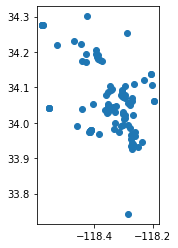

In [23]:
Smallplex_Data_Sorted.head(100).plot()

<AxesSubplot:>

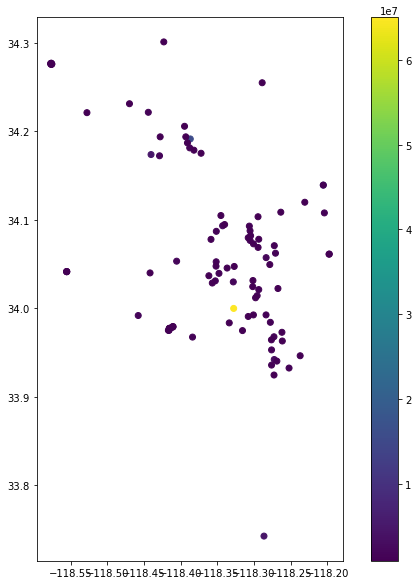

In [24]:
Smallplex_Data_Sorted.head(100).plot(figsize=(10,10),
                          column='Valuation',legend=True)

In [25]:
Smallplex_Data_Sorted.tail(100)

PCIS Permit #        Permit Type Initiating Office Issue Date  \
416   19016-20000-29764      Bldg-Addition          VAN NUYS      43864   
312   17016-10000-16192  Bldg-Alter/Repair             METRO      43784   
1115  18016-20000-18246  Bldg-Alter/Repair          VAN NUYS      43375   
1172  17016-20000-22937  Bldg-Alter/Repair          VAN NUYS      43263   
1986  14016-70000-25433  Bldg-Alter/Repair          SOUTH LA      42083   
2021  16016-20000-10089  Bldg-Alter/Repair          VAN NUYS      42537   
2154  15014-20000-00913      Bldg-Addition          VAN NUYS      42156   
126   12016-20000-12739  Bldg-Alter/Repair          VAN NUYS      41682   
265   17016-20000-21376  Bldg-Alter/Repair          VAN NUYS      43125   
268   17016-20000-25292  Bldg-Alter/Repair          VAN NUYS      43228   
1173  12016-10000-13817  Bldg-Alter/Repair             METRO      41285   
1700  16010-10000-00749           Bldg-New             METRO      42594   
1519  19010-30000-01087           Bldg-New           WEST LA      43616   
534   19010-10000-01728           Bldg-New             METRO      43714   
1814  18016-20000-16073  Bldg-Alter/Repair          VAN NUYS      43490   
127   18016-20000-16070  Bldg-Alter/Repair          VAN NUYS      43490   
1055  19016-20000-11505  Bldg-Alter/Repair          VAN NUYS      44369   
74    18016-20000-16071  Bldg-Alter/Repair          VAN NUYS      43490   
848   18016-20000-16074  Bldg-Alter/Repair          VAN NUYS      43490   
2099  12014-10000-03626      Bldg-Addition             METRO      41298   
1617  14016-10000-00810  Bldg-Alter/Repair             METRO      42045   
1206  18016-10000-01680  Bldg-Alter/Repair             METRO      43418   
2263  17016-10000-17574      Bldg-Addition             METRO      43383   
1803  12016-20000-23704  Bldg-Alter/Repair          VAN NUYS      41641   
2308  13016-10000-01952  Bldg-Alter/Repair             METRO      41878   
1728  13016-10000-12980  Bldg-Alter/Repair             METRO      41543   
216   17016-20000-00439  Bldg-Alter/Repair          VAN NUYS      42899   
2184  12016-10000-08595  Bldg-Alter/Repair             METRO      41316   
101   17014-10000-06373      Bldg-Addition             METRO      43418   
272   16016-20000-16057  Bldg-Alter/Repair          VAN NUYS      42684   
182   16016-20000-16060  Bldg-Alter/Repair          VAN NUYS      42684   
2033  18016-20000-00390  Bldg-Alter/Repair          VAN NUYS      43643   
1985  15016-10000-14185  Bldg-Alter/Repair             METRO      42292   
105   18016-30000-07762  Bldg-Alter/Repair           WEST LA      43418   
301   19016-20000-12648  Bldg-Alter/Repair          VAN NUYS      43845   
818   13016-20000-25048  Bldg-Alter/Repair          VAN NUYS      42276   
1605  17016-10000-35914  Bldg-Alter/Repair             METRO      43328   
107   15016-10000-20465  Bldg-Alter/Repair             METRO      42695   
1052  17016-10000-20683  Bldg-Alter/Repair             METRO      43178   
991   17016-20000-17576  Bldg-Alter/Repair          VAN NUYS      43035   
242   13016-10000-22440  Bldg-Alter/Repair             METRO      42789   
203   18016-10000-20180  Bldg-Alter/Repair             METRO      43378   
171   12016-20000-15174  Bldg-Alter/Repair          VAN NUYS      41388   
228   15016-20000-19733  Bldg-Alter/Repair          VAN NUYS      42303   
598   15016-20000-17153  Bldg-Alter/Repair          VAN NUYS      42514   
7     17016-10000-05525  Bldg-Alter/Repair             METRO      42873   
2198  14016-20000-23095  Bldg-Alter/Repair          VAN NUYS      42027   
1724  13014-10000-00394  Bldg-Alter/Repair             METRO      41418   
251   16016-10000-19233  Bldg-Alter/Repair             METRO      43671   
2088  17016-20000-00440  Bldg-Alter/Repair          VAN NUYS      42915   
282   13016-10000-05879  Bldg-Alter/Repair             METRO      41432   
1537  15016-10000-05996  Bldg-Alter/Repair             METRO      42180   
2136  12016-20000-13988  Bldg-Alter

<AxesSubplot:>

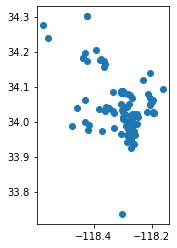

In [26]:
Smallplex_Data_Sorted.tail(100).plot()

<AxesSubplot:>

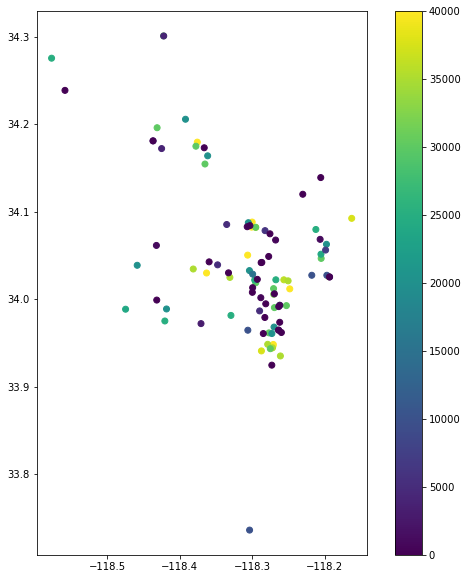

In [27]:
Smallplex_Data_Sorted.tail(100).plot(figsize=(10,10),
                          column='Valuation',legend=True)

In [28]:
Smallplex_Data[Smallplex_Data['Valuation']==0]

Smallplex_No_Valuation = Smallplex_Data[Smallplex_Data['Valuation']==0]

In [29]:
print('There are ' + str(len(Smallplex_No_Valuation)) + ' housing units with no valuation.')

There are 25 housing units with no valuation.


I then thought that mapping out the "Zip Code" column would provide me with a better understanding of the spatial distribution of smallplexes in Los Angeles. However, there are many zip codes within the City of Los Angeles. I think zip codes can be an effective way of understanding the spatial distribution of smallplexes, but in order for the data to make sense, I need to figure out a way to group zip codes together. Again, I will talk to Yoh or the TAs to get their opinions on how to group zip codes.

In [47]:
Smallplex_Data['Zip Code'].value_counts()

90003    272
90011    182
90037    142
90044    120
91601     84
90016     76
90019     75
90004     74
90001     70
90061     68
90006     66
90007     66
90029     63
90026     51
90033     49
90023     48
90018     46
90038     46
90094     43
91401     37
91606     34
90059     31
90291     29
91324     26
90043     25
90002     25
90062     23
90045     23
90047     23
91605     22
90034     21
90025     20
91342     17
91326     16
90031     16
90731     16
90032     15
90028     15
90065     15
90710     14
90027     14
90744     13
91406     12
90068     11
90041     10
90063      9
90042      9
91602      9
91042      8
91405      8
90272      7
90066      7
91607      7
90046      7
91423      6
90057      6
90036      6
90247      6
90501      6
90012      5
91352      5
91411      5
90039      5
91402      5
90024      4
90015      4
90049      4
90035      4
90064      4
91604      4
91343      3
91311      3
90048      3
91040      3
91331      3
91335      3
90005      3

In [49]:
Smallplex_By_Zip_Code = Smallplex_Data['Zip Code'].value_counts()
Smallplex_By_Zip_Code

90003    272
90011    182
90037    142
90044    120
91601     84
90016     76
90019     75
90004     74
90001     70
90061     68
90006     66
90007     66
90029     63
90026     51
90033     49
90023     48
90018     46
90038     46
90094     43
91401     37
91606     34
90059     31
90291     29
91324     26
90043     25
90002     25
90062     23
90045     23
90047     23
91605     22
90034     21
90025     20
91342     17
91326     16
90031     16
90731     16
90032     15
90028     15
90065     15
90710     14
90027     14
90744     13
91406     12
90068     11
90041     10
90063      9
90042      9
91602      9
91042      8
91405      8
90272      7
90066      7
91607      7
90046      7
91423      6
90057      6
90036      6
90247      6
90501      6
90012      5
91352      5
91411      5
90039      5
91402      5
90024      4
90015      4
90049      4
90035      4
90064      4
91604      4
91343      3
91311      3
90048      3
91040      3
91331      3
91335      3
90005      3

In [50]:
Smallplex_By_Zip_Code = Smallplex_By_Zip_Code.reset_index()
Smallplex_By_Zip_Code

index  Zip Code
0   90003       272
1   90011       182
2   90037       142
3   90044       120
4   91601        84
5   90016        76
6   90019        75
7   90004        74
8   90001        70
9   90061        68
10  90006        66
11  90007        66
12  90029        63
13  90026        51
14  90033        49
15  90023        48
16  90018        46
17  90038        46
18  90094        43
19  91401        37
20  91606        34
21  90059        31
22  90291        29
23  91324        26
24  90043        25
25  90002        25
26  90062        23
27  90045        23
28  90047        23
29  91605        22
30  90034        21
31  90025        20
32  91342        17
33  91326        16
34  90031        16
35  90731        16
36  90032        15
37  90028        15
38  90065        15
39  90710        14
40  90027        14
41  90744        13
42  91406        12
43  90068        11
44  90041        10
45  90063         9
46  90042         9
47  91602         9
48  91042         8
49  91405         8
50  90272         7
51  90066         7
52  91607         7
53  90046         7
54  91423         6
55  90057         6
56  90036         6
57  90247         6
58  90501         6
59  90012         5
60  91352         5
61  91411         5
62  90039         5
63  91402         5
64  90024         4
65  90015         4
66  90049         4
67  90035         4
68  90064         4
69  91604         4
70  91343         3
71  91311         3
72  90048         3
73  91040         3
74  91331         3
75  91335         3
76  90005         3
77  90013         3
78  90210         2
79  90077         2
80  91316         1
81  91403         1
82  90008         1
83  91306         1
84  90020         1
85  90732         1
86  90230         1
87  90292         1
88  91325         1
89  91303         1

In [51]:
Smallplex_By_Zip_Code.columns = ['Zip Code','count']
Smallplex_By_Zip_Code

Zip Code  count
0     90003    272
1     90011    182
2     90037    142
3     90044    120
4     91601     84
5     90016     76
6     90019     75
7     90004     74
8     90001     70
9     90061     68
10    90006     66
11    90007     66
12    90029     63
13    90026     51
14    90033     49
15    90023     48
16    90018     46
17    90038     46
18    90094     43
19    91401     37
20    91606     34
21    90059     31
22    90291     29
23    91324     26
24    90043     25
25    90002     25
26    90062     23
27    90045     23
28    90047     23
29    91605     22
30    90034     21
31    90025     20
32    91342     17
33    91326     16
34    90031     16
35    90731     16
36    90032     15
37    90028     15
38    90065     15
39    90710     14
40    90027     14
41    90744     13
42    91406     12
43    90068     11
44    90041     10
45    90063      9
46    90042      9
47    91602      9
48    91042      8
49    91405      8
50    90272      7
51    90066      7
52    91607      7
53    90046      7
54    91423      6
55    90057      6
56    90036      6
57    90247      6
58    90501      6
59    90012      5
60    91352      5
61    91411      5
62    90039      5
63    91402      5
64    90024      4
65    90015      4
66    90049      4
67    90035      4
68    90064      4
69    91604      4
70    91343      3
71    91311      3
72    90048      3
73    91040      3
74    91331      3
75    91335      3
76    90005      3
77    90013      3
78    90210      2
79    90077      2
80    91316      1
81    91403      1
82    90008      1
83    91306      1
84    90020      1
85    90732      1
86    90230      1
87    90292      1
88    91325      1
89    91303      1

<AxesSubplot:title={'center':'Number of Permits by Zip Code'}, xlabel='Zip Code'>

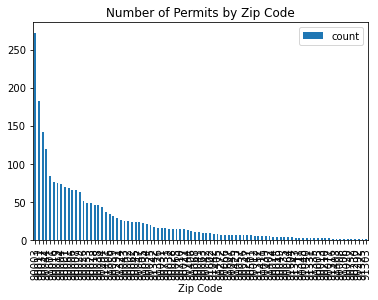

In [54]:
Smallplex_By_Zip_Code.plot.bar(x = 'Zip Code', y = 'count', title = 'Number of Permits by Zip Code')

<AxesSubplot:>

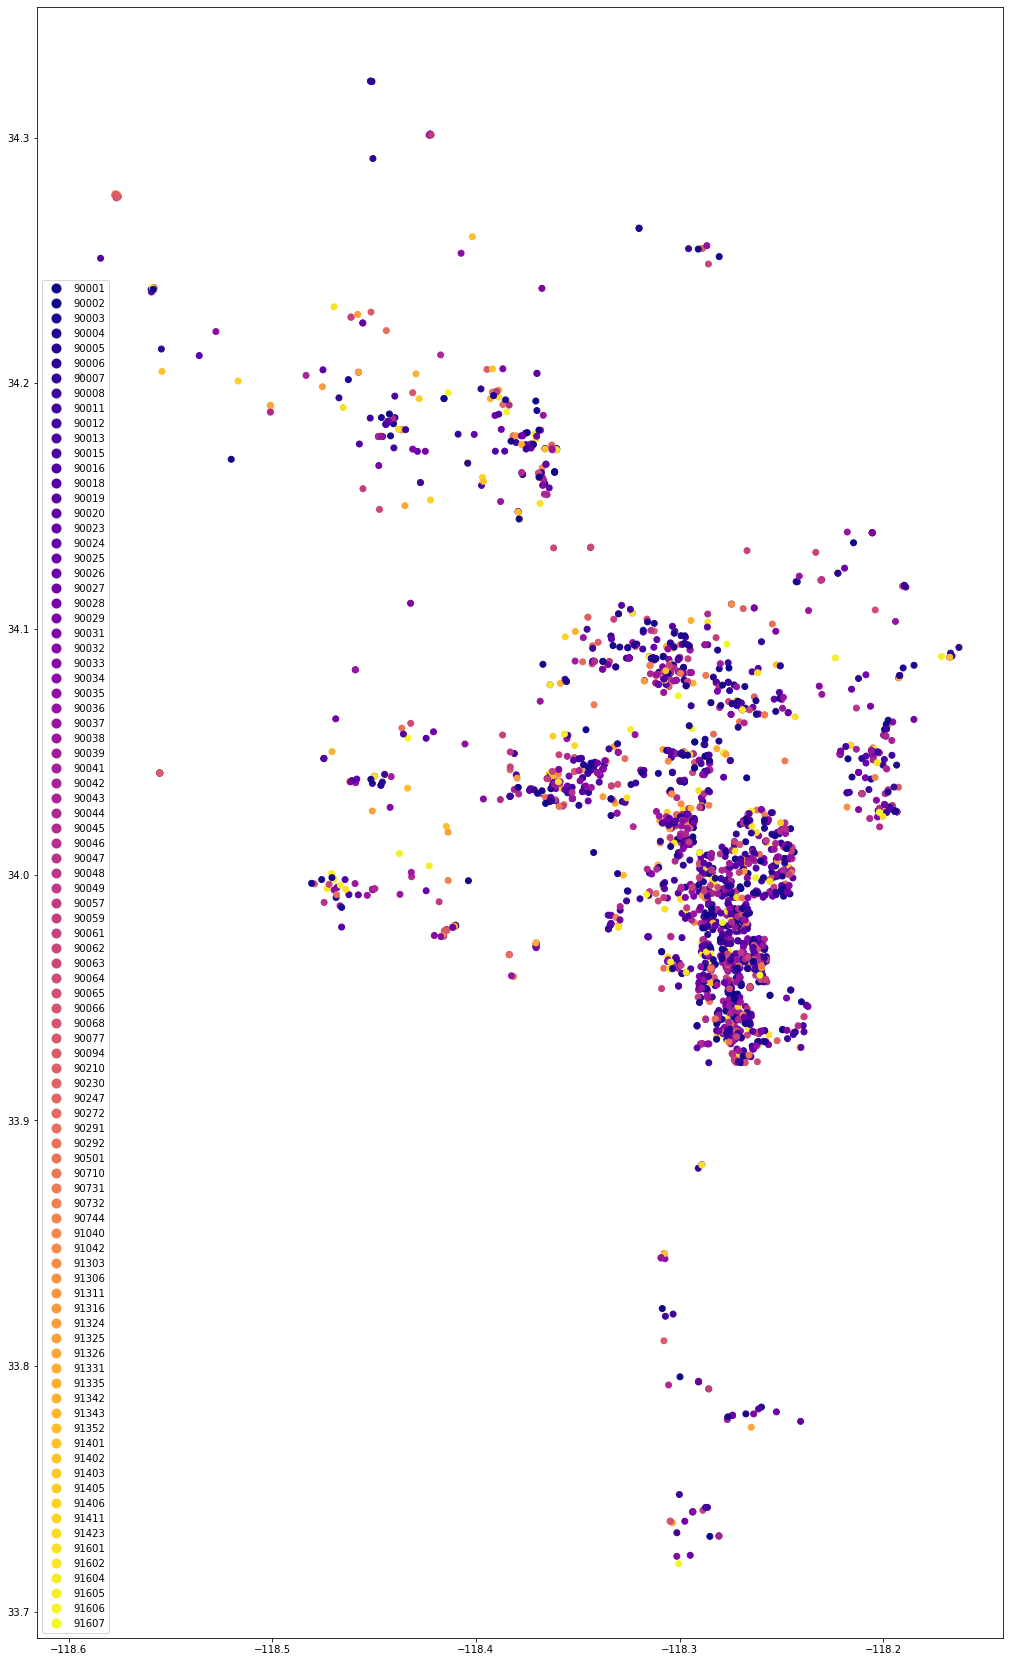

In [58]:
Smallplex_Data.plot(
    figsize = (30,30),
    column = 'Zip Code',
    cmap = 'plasma', legend = True)

Finally, I separted smallplexes into 3 categories: duplexes, triplexes, and fourplexes. The dataset showed that there are virtually, no triplexes and fourplexes in the City of Los Angeles. There are also very few duplexes. 

To highlight shortages in smallplexes, I think I would benefit from highlighting the number of single family home permits in Los Angeles. 

In [36]:
Smallplex_Data['# of Residential Dwelling Units'].value_counts()

2    2059
3     158
4     135
Name: # of Residential Dwelling Units, dtype: int64

In [37]:
Number_of_Residential_Dwelling_Units = Smallplex_Data['# of Residential Dwelling Units'].value_counts()
Number_of_Residential_Dwelling_Units

2    2059
3     158
4     135
Name: # of Residential Dwelling Units, dtype: int64

In [38]:
Number_of_Residential_Dwelling_Units = Number_of_Residential_Dwelling_Units.reset_index()
Number_of_Residential_Dwelling_Units

index  # of Residential Dwelling Units
0     2                             2059
1     3                              158
2     4                              135

In [39]:
Number_of_Residential_Dwelling_Units.columns = ['Number of Units', 'count']
Number_of_Residential_Dwelling_Units

Number of Units  count
0               2   2059
1               3    158
2               4    135

<AxesSubplot:title={'center':'Number of Residential Dwelling Units'}, xlabel='Number of Units'>

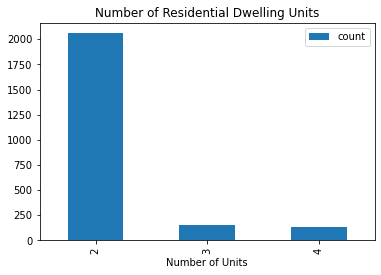

In [40]:
Number_of_Residential_Dwelling_Units.plot.bar(x = 'Number of Units',y = 'count', title = 'Number of Residential Dwelling Units')

<AxesSubplot:>

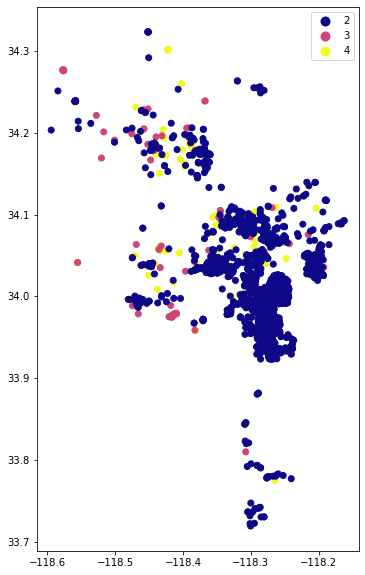

In [41]:
Smallplex_Data.plot(
    figsize = (10,10),
    column = '# of Residential Dwelling Units',
    cmap = 'plasma', legend = True)

In [42]:
Smallplex_Data.crs

<Geographic 2D CRS: +init=epsg:4326 +type=crs>
Name: WGS 84
Axis Info [ellipsoidal]:
- lon[east]: Longitude (degree)
- lat[north]: Latitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [43]:
Smallplex_Data_Base_Map = Smallplex_Data.to_crs(epsg=3857)

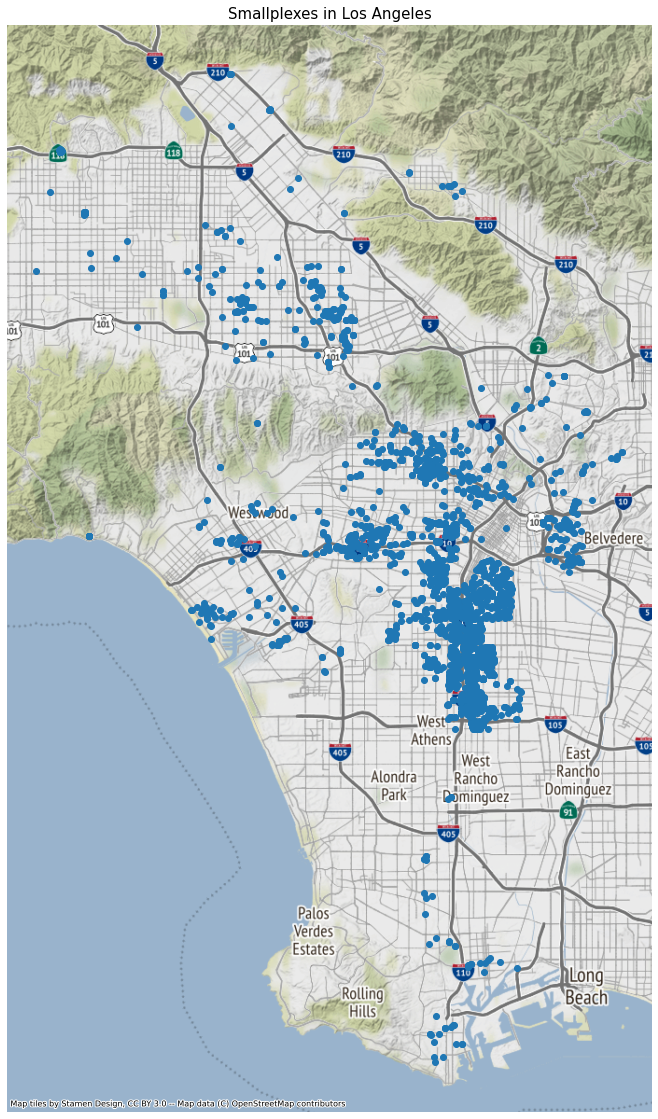

In [44]:
ax = Smallplex_Data_Base_Map.plot(figsize=(20,20))
ax.set_title('Smallplexes in Los Angeles', fontsize = 15)
ax.axis('off')
ctx.add_basemap(ax)


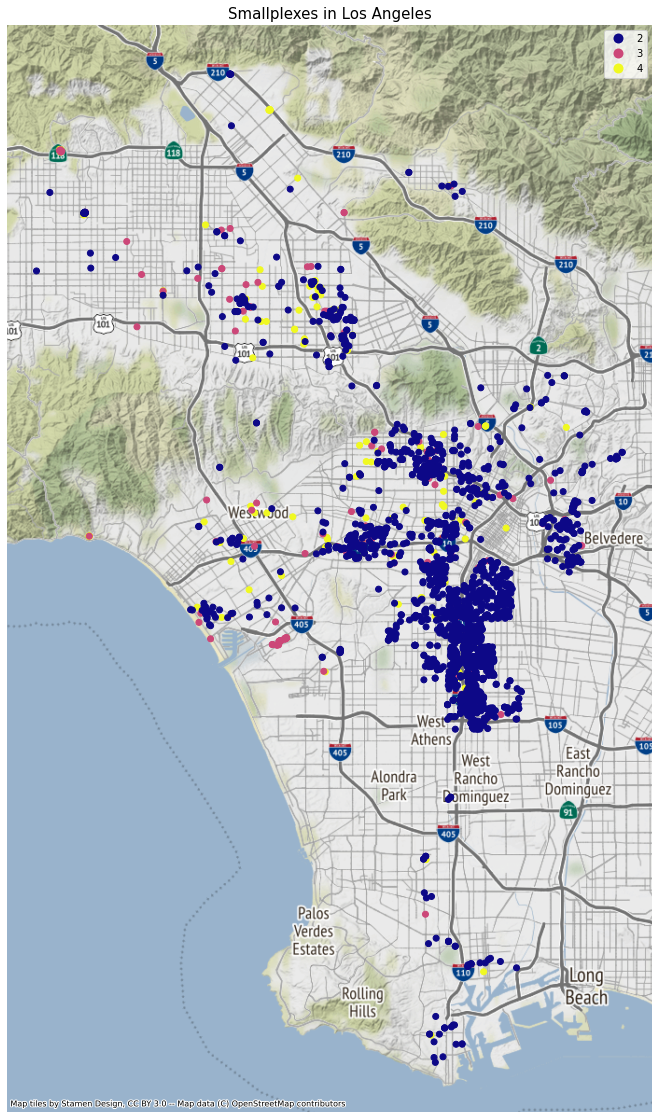

In [45]:
ax = Smallplex_Data_Base_Map.plot(
            figsize=(20,20),   
            column = '# of Residential Dwelling Units',  
            cmap = 'plasma', legend = True,           
            legend_kwds={
               'loc': 'upper right',
               'bbox_to_anchor':(1,1)
            }        
) 
ax.axis('off')
ax.set_title('Smallplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax)

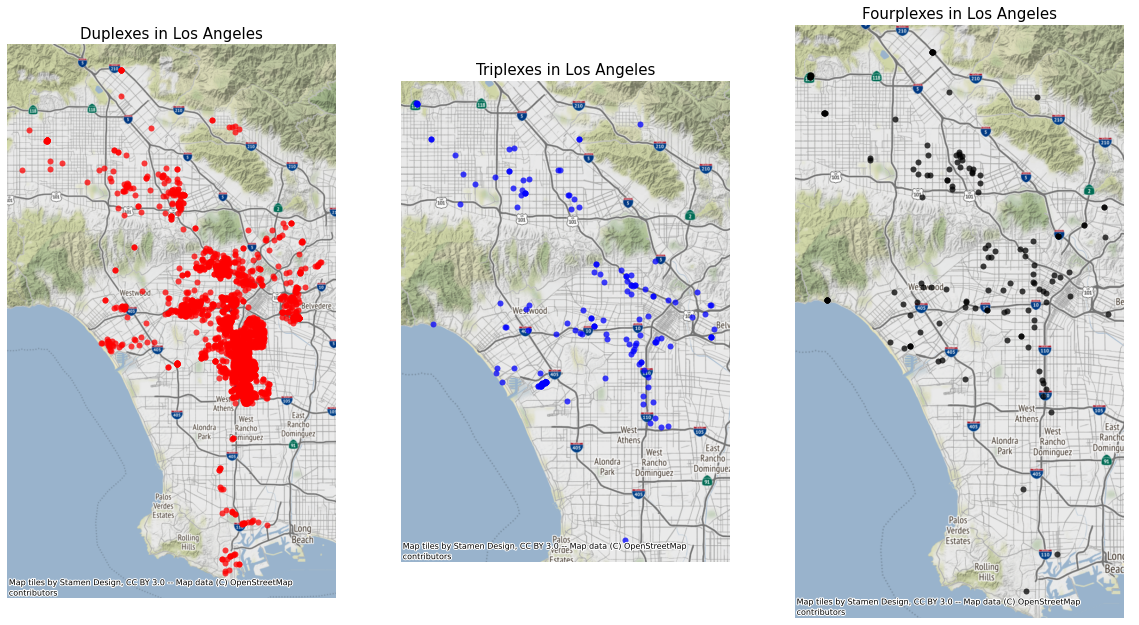

In [59]:
fig, axs = plt.subplots(1, 3, figsize=(20, 20))
ax1, ax2, ax3 = axs

Smallplex_Data_Base_Map[Smallplex_Data_Base_Map['# of Residential Dwelling Units'] == '2'].plot(figsize=(20,20), color = 'r', linewidth = 0, alpha = 0.75, ax = ax1)
ax1.axis("off")
ax1.set_title('Duplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax1)

Smallplex_Data_Base_Map[Smallplex_Data_Base_Map['# of Residential Dwelling Units'] == '3'].plot(figsize=(20,20), color = 'b', linewidth = 0, alpha = 0.75, ax = ax2)
ax2.axis("off")
ax2.set_title('Triplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax2)

Smallplex_Data_Base_Map[Smallplex_Data_Base_Map['# of Residential Dwelling Units'] == '4'].plot(figsize=(20,20), color = 'black', linewidth = 0, alpha = 0.75, ax = ax3)
ax3.axis("off")
ax3.set_title('Fourplexes in Los Angeles', fontsize=15)
ctx.add_basemap(ax3)

## Conclusion and Next Steps

This notebook provided information on the current availablity of smallplexes in Los Angeles. However, for me to gain more valuable insight on how SB9 can impact the availability of middle housing, I need to gain a better understanding of the spatial distribution of the existing smallplexes. To do so, I need to figure out an effective way to group zip codes together.

Additionally, I need to figure out the valuation of these units. It would be interesting to know the spatial distribution of units with high valuation and units with low valuation.

It would also be beneficial to compare the availability of these smallplexes and the availability of single family homes.